<a href="https://colab.research.google.com/github/jameskrice7/1st-PhD-paper/blob/main/misinfo_double_tuned.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving classified_misinformation_double_tuning_result.csv to classified_misinformation_double_tuning_result.csv


In [ ]:
import pandas as pd
df = pd.read_csv('classified_misinformation_double_tuning_result.csv')

In [ ]:
print(df.head())

                                           full_text  retweet_count  \
0                         <USER_285999> its real fun            0.0   
1  <USER_271589> there's a proposed CN that links...            0.0   
2  <USER_303779> <USER_220780> <USER_401209> pers...            0.0   
3  every broad Theory of Humanity is some combina...            1.0   
4  <USER_22308> the monks were serious when they ...            0.0   

                  created_at  favorite_count                   topic  \
0  2020-10-30 22:20:16+00:00             1.0  Environmental projects   
1  2024-10-13 17:45:49+00:00             4.0          Climate Change   
2  2023-05-10 01:23:03+00:00             4.0        Water management   
3  2023-04-04 13:01:50+00:00             5.0            Biodiversity   
4  2023-01-19 23:12:05+00:00             5.0        Water management   

       misinformation  confidence fine-tuned_misinformation  \
0  Not Misinformation        0.50            misinformation   
1      Misinfo

In [ ]:
# List all unique labels in the 'fine-tuned_misinformation_fever' column
unique_labels = df['fine-tuned_misinformation_fever'].unique()

# Print the unique labels
print("Unique labels in 'fine-tuned_misinformation_fever':")
for label in unique_labels:
    print(f"- {label}")


Unique labels in 'fine-tuned_misinformation_fever':
- not misinformation
- NOT_MISINFORMATION
- MISINFORMATION
- nan
- misinformation
- not_misinformation
- not
- notmisinformation


In [ ]:
import numpy as np

# Define mapping dictionary
label_map = {
    'not misinformation': 'Not Misinformation',
    'NOT_MISINFORMATION': 'Not Misinformation',
    'MISINFORMATION': 'Misinformation',
    'misinformation': 'Misinformation',
    'not_misinformation': 'Not Misinformation',
    'not': 'Not Misinformation',
    'notmisinformation': 'Not Misinformation',
    np.nan: 'NA'
}

# Apply mapping (convert all strings to lowercase to handle inconsistencies)
df['fine-tuned_misinformation_fever_cleaned'] = df['fine-tuned_misinformation_fever']\
    .str.lower()\
    .map(label_map)

# Fill NaNs explicitly
df['fine-tuned_misinformation_fever_cleaned'] = df['fine-tuned_misinformation_fever_cleaned'].fillna('NA')

# Check result
print(df['fine-tuned_misinformation_fever_cleaned'].value_counts())


fine-tuned_misinformation_fever_cleaned
Not Misinformation    21809
Misinformation         1677
NA                     1596
Name: count, dtype: int64


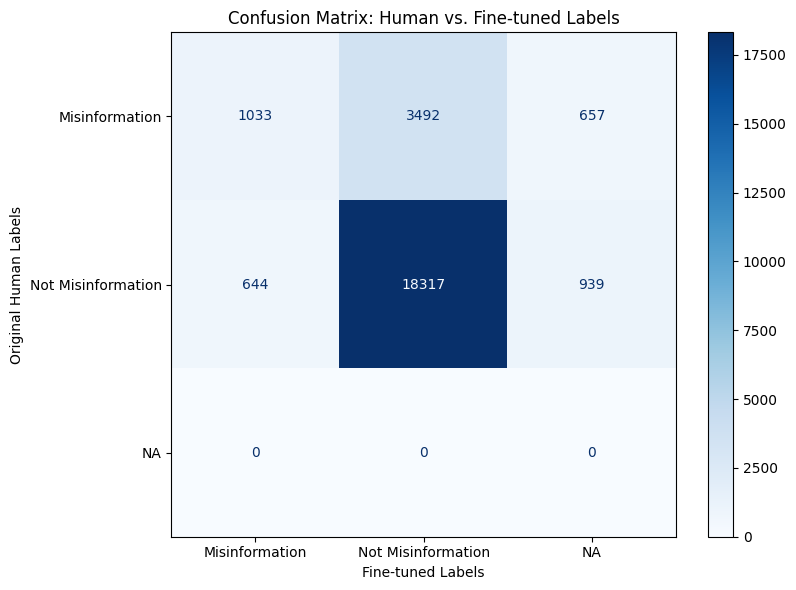

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Optional: Ensure both columns are of consistent formatting
df['misinformation_cleaned'] = df['misinformation'].str.strip().str.title()

# Create a confusion matrix
cm = confusion_matrix(df['misinformation_cleaned'], df['fine-tuned_misinformation_fever_cleaned'], labels=['Misinformation', 'Not Misinformation', 'NA'])

# Display confusion matrix as heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Misinformation', 'Not Misinformation', 'NA'])

fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap='Blues', ax=ax, values_format='d')
plt.title("Confusion Matrix: Human vs. Fine-tuned Labels")
plt.xlabel("Fine-tuned Labels")
plt.ylabel("Original Human Labels")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

# Standardize label formatting
df['misinformation_cleaned'] = df['misinformation'].str.strip().str.title()
df['fine_tuned_cleaned'] = df['fine-tuned_misinformation_fever_cleaned']

# Filter to rows with valid labels only (exclude NA)
mask = (df['misinformation_cleaned'] != 'NA') & (df['fine_tuned_cleaned'] != 'NA')
y_true = df.loc[mask, 'misinformation_cleaned']
y_pred = df.loc[mask, 'fine_tuned_cleaned']

# Compute metrics
accuracy = accuracy_score(y_true, y_pred)
recall = recall_score(y_true, y_pred, pos_label='Misinformation')
f1 = f1_score(y_true, y_pred, pos_label='Misinformation')

# Print results
print("Classification Report (Misinformation = Positive Class):")
print(f"Accuracy: {accuracy:.3f}")
print(f"Recall:   {recall:.3f}")
print(f"F1 Score: {f1:.3f}")


Classification Report (Misinformation = Positive Class):
Accuracy: 0.824
Recall:   0.228
F1 Score: 0.333


<ipython-input-8-1863292002>:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month'] = df['created_at'].dt.to_period('M').dt.to_timestamp()


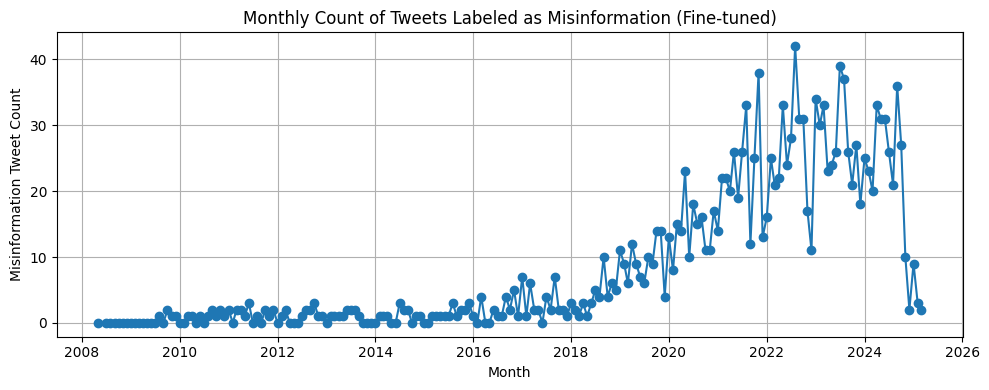

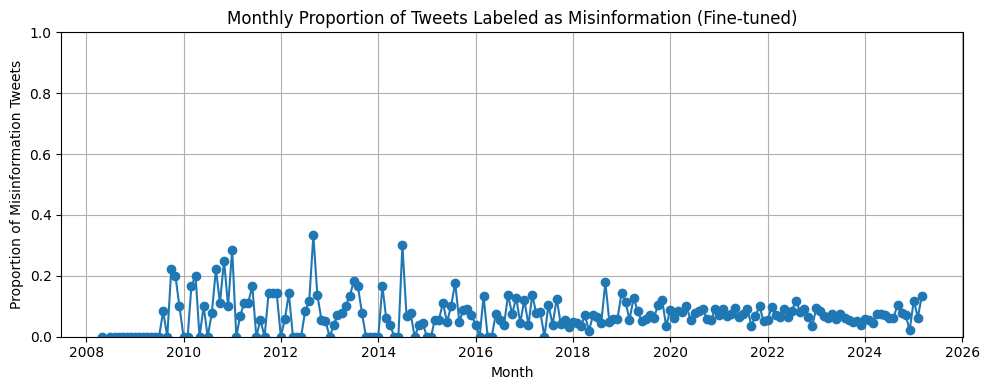

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime format
df['created_at'] = pd.to_datetime(df['created_at'])

# Create a new column for month/year
df['month'] = df['created_at'].dt.to_period('M').dt.to_timestamp()

# Filter out NAs if desired
df_filtered = df[df['fine-tuned_misinformation_fever_cleaned'] != 'NA']

# Group by month
monthly = df_filtered.groupby('month').agg(
    total_tweets=('fine-tuned_misinformation_fever_cleaned', 'count'),
    misinfo_tweets=('fine-tuned_misinformation_fever_cleaned', lambda x: (x == 'Misinformation').sum())
)

# Compute proportion
monthly['misinfo_proportion'] = monthly['misinfo_tweets'] / monthly['total_tweets']

# Plot absolute count
plt.figure(figsize=(10, 4))
plt.plot(monthly.index, monthly['misinfo_tweets'], marker='o')
plt.title("Monthly Count of Tweets Labeled as Misinformation (Fine-tuned)")
plt.xlabel("Month")
plt.ylabel("Misinformation Tweet Count")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot proportion
plt.figure(figsize=(10, 4))
plt.plot(monthly.index, monthly['misinfo_proportion'], marker='o')
plt.title("Monthly Proportion of Tweets Labeled as Misinformation (Fine-tuned)")
plt.xlabel("Month")
plt.ylabel("Proportion of Misinformation Tweets")
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()
